# Winery classification using the one-dimensional Gaussian

The **Wine** data set is the running example for our discussion of the *generative approach to classification*. 

The data can be downloaded from the UCI repository (https://archive.ics.uci.edu/ml/datasets/wine). It contains 178 labeled data points, each corresponding to a bottle of wine:
* The features (`x`): a 13-dimensional vector consisting of visual and chemical features for the bottle of wine
* The label (`y`): the winery from which the bottle came (1,2,3)

Before continuing, download the data set and place it in the same directory as this notebook.

## 1. Load in the data set

We start by loading the packages we will need.

In [20]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

Next, we load the Wine data set. There are 178 data points, each with 13 features and a label (1,2,3).
We will divide these into a training set of 130 points and a test set of 48 points.

In [2]:
# 'wine.data.txt' needs to be in the same directory
data = np.loadtxt('wine.data.txt', delimiter=',')
# Names of features
featurenames = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                'OD280/OD315 of diluted wines', 'Proline']

In [13]:
np.shape(data)

(178, 14)

Fix a particular "random" permutation of the data, and use these to effect the training / test split.
We get four arrays:
* `trainx`: 130x13, the training points
* `trainy`: 130x1, labels of the training points
* `testx`: 48x13, the test points
* `testy`: 48x1, labels of the test points

In [10]:
np.random.permutation(178)

array([150, 131, 146,  87, 138,   3,  25,  43, 123,  82,  74, 149, 163,
       107,  15,  63,  21, 160,  45,  52, 116, 101,  17, 155,  38,  22,
       152, 142, 118,  70, 135, 166,  35, 134, 127,  56, 100, 143, 125,
       156,  29,  95, 117,  91,  86, 104, 171,  99,  79, 176,  98, 124,
        18,  10,  61, 159,   6,   4,   1, 169,  96,  13,  48,  28,  31,
        51, 174, 161,  68, 122,  93, 175,  58,  92,  33, 154, 133, 102,
       110,  42,  55, 144, 136, 114, 103,  78, 177,  37, 112, 162, 130,
       173,  20,  69,  54,  97, 111,  90,  65,  47, 119,  11,   5, 126,
        67,  62,  14, 141,  59, 158,  77,  23, 148,   9,   2, 165,  83,
        73,  39,  76,  84,  88, 168, 120, 167,  71, 172, 153,  94,   7,
       113, 115,  64,  34,  57,  16,  41,  80, 137,  49, 129,  30,  66,
        36, 147,  75,  44,  81,  85, 128, 106,  26, 151, 170,  24,  60,
       140,  53,  19,  72, 105,  50, 108, 121, 157,  12, 132, 109,  32,
       139,  46,   8,  27,  89,   0, 164,  40, 145])

In [15]:
# Split 178 instances into training set (trainx, trainy) of size 130 and test set (testx, testy) of size 48
# Also split apart data and labels
np.random.seed(0)
perm = np.random.permutation(178)
trainx = data[perm[0:130],1:14]
trainy = data[perm[0:130],0]
testx = data[perm[130:178], 1:14]
testy = data[perm[130:178],0]

Let's see how many training points there are from each class.

In [16]:
sum(trainy==1), sum(trainy==2), sum(trainy==3)

(43, 54, 33)

In [17]:
np.unique(trainy)

array([1., 2., 3.])

### <font color="magenta">Fast exercise</font>

Can you figure out how many test points there are from each class? *Note down these three numbers: you will enter it as part of this week's programming assignment.*

In [19]:
# modify this cell
for i in range(1,4):
    print('The number of samples for Wine #',i,' is:',sum(testy==i))

The number of samples for Wine # 1  is: 16
The number of samples for Wine # 2  is: 17
The number of samples for Wine # 3  is: 15


## 2. Look at the distribution of a single feature from one of the wineries

Let's pick just one feature: 'Alcohol'. This is the first feature, that is, number 0. Here is a *histogram* of this feature's values under class 1, along with the *Gaussian fit* to this distribution.

<img src="histogram.png">


Hmm: how can we generate a figure like this? 

The following function, **density_plot**, does this for any feature and label. The first line adds an interactive component that lets you choose these parameters using sliders. 

<font color="magenta">Try it out!</font> And then, look at the code carefully to understand exactly what it is doing, line by line.

In [22]:
@interact_manual( feature=IntSlider(0,0,12), label=IntSlider(1,1,3))
def density_plot(feature, label):
    plt.hist(trainx[trainy==label,feature], density=True)
    #
    mu = np.mean(trainx[trainy==label,feature]) # mean
    var = np.var(trainx[trainy==label,feature]) # variance
    std = np.sqrt(var) # standard deviation
    #
    x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
    plt.plot(x_axis, norm.pdf(x_axis,mu,std), 'r', lw=2)
    plt.title("Winery "+str(label) )
    plt.xlabel(featurenames[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.show()

interactive(children=(IntSlider(value=0, description='feature', max=12), IntSlider(value=1, description='label…

### <font color="magenta">Fast exercise</font>

In the function **density_plot**, the code for plotting the Gaussian density focuses on the region within 3 standard deviations of the mean. Do you see where this happens? Why do you think we make this choice?

Here's something for you to figure out: for which feature (0-12) does the distribution of (training set) values for winery 1 have the *smallest* standard deviation? Write down the answer: you will need to enter it as part of this week's programming assignment.

In [34]:
# modify this cell
std = np.zeros(13)
for feature in range(0,13):
    std[feature] = np.std(trainx[trainy==1,feature])
featurenames[np.where(std==np.min(std))[0][0]]

'Nonflavanoid phenols'

## 3. Fit a Gaussian to each class

Let's define a function that will fit a Gaussian generative model to the three classes, restricted to just a single feature.

In [35]:
# Assumes y takes on values 1,2,3
def fit_generative_model(x,y,feature):
    k = 3 # number of classes
    mu = np.zeros(k+1) # list of means
    var = np.zeros(k+1) # list of variances
    pi = np.zeros(k+1) # list of class weights
    for label in range(1,k+1):
        indices = (y==label)
        mu[label] = np.mean(x[indices,feature])
        var[label] = np.var(x[indices,feature])
        pi[label] = float(sum(indices))/float(len(y))
    return mu, var, pi

Call this function on the feature 'alcohol'. What are the class weights?

In [36]:
feature = 0 # 'alcohol'
mu, var, pi = fit_generative_model(trainx, trainy, feature)
print(pi[1:])

[0.33076923 0.41538462 0.25384615]


Next, display the Gaussian distribution for each of the three classes

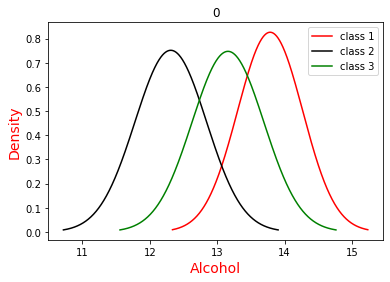

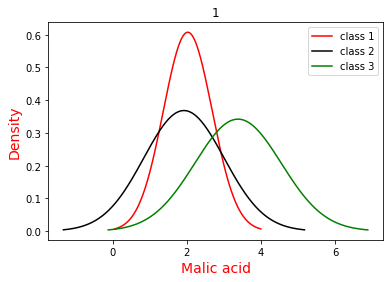

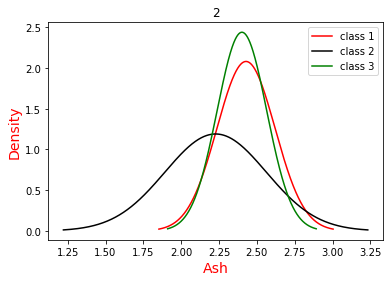

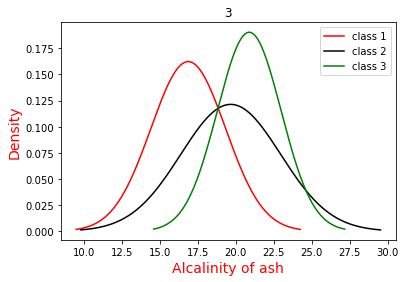

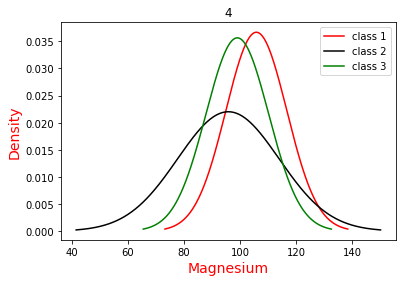

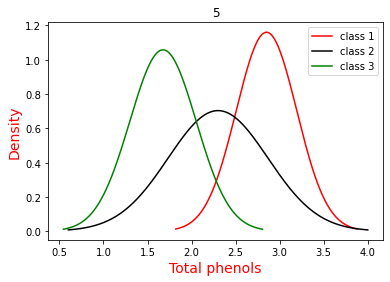

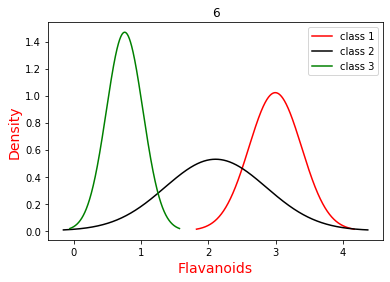

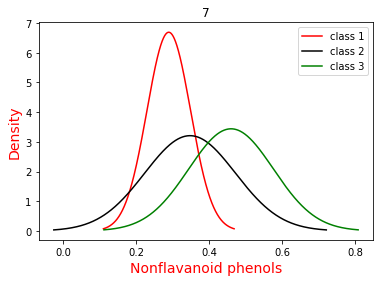

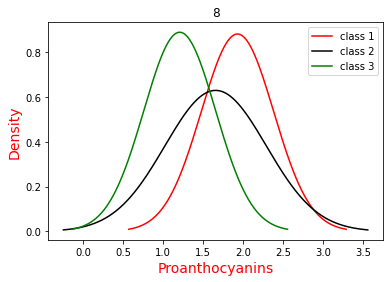

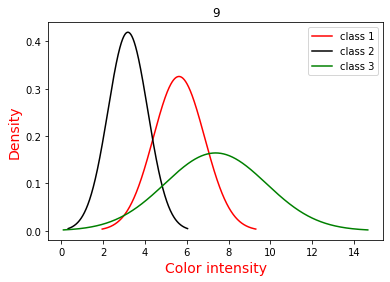

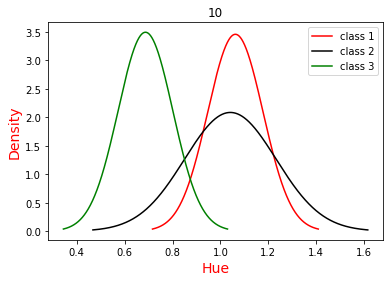

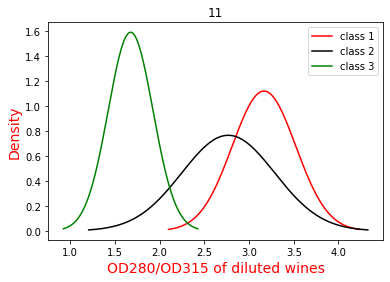

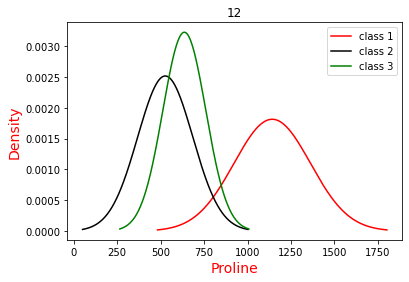

In [40]:

def show_densities(feature):
    mu, var, pi = fit_generative_model(trainx, trainy, feature)
    colors = ['r', 'k', 'g']
    for label in range(1,4):
        m = mu[label]
        s = np.sqrt(var[label])
        x_axis = np.linspace(m - 3*s, m+3*s, 1000)
        plt.plot(x_axis, norm.pdf(x_axis,m,s), colors[label-1], label="class " + str(label))
    plt.xlabel(featurenames[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.title(str(feature))
    plt.legend()
    plt.show()

for feature in np.arange(0,len(featurenames)):
    show_densities(feature)

### <font color="magenta">Fast exercise</font>

Use the widget above to look at the three class densities for each of the 13 features. Here are some questions for you:
* For which feature (0-12) do the densities for classes 1 and 3 *overlap* the most?
* For which feature (0-12) is class 3 the most spread out relative to the other two classes?
* For which feature (0-12) do the three classes seem the most *separated* (this is somewhat subjective at present)?

*Write down the answers to these questions: you will enter them as part of this week's assignment.*

## 4. Predict labels for the test set

How well can we predict the class (1,2,3) based just on one feature? The code below lets us find this out.

In [42]:
@interact( feature=IntSlider(0,0,12) )
def test_model(feature):
    mu, var, pi = fit_generative_model(trainx, trainy, feature)

    k = 3 # Labels 1,2,...,k
    n_test = len(testy) # Number of test points
    score = np.zeros((n_test,k+1))
    for i in range(0,n_test):
        for label in range(1,k+1):
            score[i,label] = np.log(pi[label]) + norm.logpdf(testx[i,feature], mu[label], np.sqrt(var[label]))
    predictions = np.argmax(score[:,1:4], axis=1) + 1
    # Finally, tally up score
    errors = np.sum(predictions != testy)
    print("Test error using feature " + featurenames[feature] + ": " + str(errors) + "/" + str(n_test))

interactive(children=(IntSlider(value=0, description='feature', max=12), Output()), _dom_classes=('widget-inte…

### <font color="magenta">One last exercise</font>

In this notebook, we are looking at classifiers that use just one out of a possible 13 features. Choosing a subset of features is called **feature selection**. In general, this is something we would need to do based solely on the *training set*--that is, without peeking at the *test set*.

For the wine data, compute the training error and test error associated with each choice of feature.

In [51]:
### Write your code here
errors = []
for ind,feature in enumerate(featurenames):

    mu, var, pi = fit_generative_model(trainx, trainy, ind)

    k = 3 # Labels 1,2,...,k
    n_train = len(trainy) # Number of test points
    score = np.zeros((n_train,k+1))
    for i in range(0,n_train):
        for label in range(1,k+1):
            
            score[i,label] = np.log(pi[label]) + norm.logpdf(trainx[i,ind], mu[label], np.sqrt(var[label]))
    predictions = np.argmax(score[:,1:4], axis=1) + 1
    # Finally, tally up score
    errors.append(np.sum(predictions != trainy))

error_sorted = np.argsort(errors)
print(error_sorted)
for i in error_sorted:
    print("Test error using feature " + featurenames[i] + ": " + str(errors[i]) + "/" + str(n_train))

[ 6 12  9  0  5 11 10  1  7  8  4  2  3]
Test error using feature Flavanoids: 27/130
Test error using feature Proline: 35/130
Test error using feature Color intensity: 38/130
Test error using feature Alcohol: 44/130
Test error using feature Total phenols: 46/130
Test error using feature OD280/OD315 of diluted wines: 47/130
Test error using feature Hue: 48/130
Test error using feature Malic acid: 49/130
Test error using feature Nonflavanoid phenols: 55/130
Test error using feature Proanthocyanins: 60/130
Test error using feature Magnesium: 61/130
Test error using feature Ash: 66/130
Test error using feature Alcalinity of ash: 68/130


In [52]:
errors = []
for ind,feature in enumerate(featurenames):

    mu, var, pi = fit_generative_model(trainx, trainy, ind)

    k = 3 # Labels 1,2,...,k
    n_test = len(testy) # Number of test points
    score = np.zeros((n_test,k+1))
    for i in range(0,n_test):
        for label in range(1,k+1):
            
            score[i,label] = np.log(pi[label]) + norm.logpdf(testx[i,ind], mu[label], np.sqrt(var[label]))
    predictions = np.argmax(score[:,1:4], axis=1) + 1
    # Finally, tally up score
    errors.append(np.sum(predictions != testy))

error_sorted = np.argsort(errors)
print(error_sorted)
for i in error_sorted:
    print("Test error using feature " + featurenames[i] + ": " + str(errors[i]) + "/" + str(n_train))

[ 6  9 10  5  8  0 12 11  4  1  3  7  2]
Test error using feature Flavanoids: 8/130
Test error using feature Color intensity: 10/130
Test error using feature Hue: 14/130
Test error using feature Total phenols: 16/130
Test error using feature Proanthocyanins: 16/130
Test error using feature Alcohol: 17/130
Test error using feature Proline: 17/130
Test error using feature OD280/OD315 of diluted wines: 19/130
Test error using feature Magnesium: 21/130
Test error using feature Malic acid: 23/130
Test error using feature Alcalinity of ash: 23/130
Test error using feature Nonflavanoid phenols: 23/130
Test error using feature Ash: 29/130


Based on your findings, answer the following questions:
* Which three features have the lowest training error? List them in order (best first).
* Which three features have the lowest test error? List them in order (best first).

*Note down your answers: you will enter them later, as part of this week's programming assignment*.